In [1]:
# libraries import

## Temporal Causal Discovery Framework

Based on __["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19)__ paper to present a a model for inference and automatic discovery o causal relationship between variable with causal validation and delay discovery.

In [2]:
"""Shows all algorithm options"""

%run -i "TCDF-EM/runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

options:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of hidden lay

### Trial with sample dataset (finance)

Arguments: Namespace(cuda=True, epochs=1000, kernel_size=4, hidden_layers=1, learning_rate=0.01, optimizer='Adam', log_interval=500, seed=1111, dilation_coefficient=4, significance=0.8, plot=True, ground_truth={'TCDF-EM/data/Finance/random-rels_40_1_3_returns30007000_header.csv': 'TCDF-EM/data/Finance/random-rels_40_1_3.csv'}, data=None)

 Dataset:  random-rels_40_1_3_returns30007000_header.csv

 Analysis started for target:  S0
Epoch:  1 [0%] 	Loss: 1.023061
Epoch: 500 [50%] 	Loss: 0.177820
Epoch: 1000 [100%] 	Loss: 0.174530
Potential causes:  [7, 11]
Validated causes:  []

 Analysis started for target:  S1
Epoch:  1 [0%] 	Loss: 0.806606
Epoch: 500 [50%] 	Loss: 0.183716
Epoch: 1000 [100%] 	Loss: 0.171000
Potential causes:  [11, 7]
Validated causes:  [11]

 Analysis started for target:  S2
Epoch:  1 [0%] 	Loss: 0.864067
Epoch: 500 [50%] 	Loss: 0.149287
Epoch: 1000 [100%] 	Loss: 0.140785
Potential causes:  [19, 13]
Validated causes:  [19, 13]

 Analysis started for target:  S3
Epoch:  1

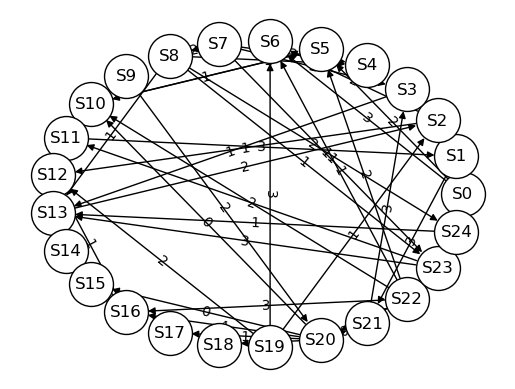

In [3]:
%run -i "TCDF-EM/runTCDF.py" --ground_truth TCDF-EM/data/Finance/random-rels_40_1_3_returns30007000_header.csv=TCDF-EM/data/Finance/random-rels_40_1_3.csv --plot --cuda --kernel_size 4 --dilation_coefficient 4 --significance .8 --hidden_layers=1

***INSERT DATA ANALYSIS***

# TCDF Framework: Critical Limitations Analysis

## Overview

While the Temporal Causal Discovery Framework (TCDF) presents an innovative approach to causal discovery in time series, several fundamental limitations emerge when considering real-world applications. This section provides a detailed technical analysis of these constraints.

---

## 1. Computational Complexity Explosion

### Mathematical Formulation

For a dataset with **N** time series of length **T**, TCDF requires:

```python
# Computational requirements
N_networks = N  # One network per time series
N_parameters_per_network = N * K * L * filters  # Depthwise separable conv
Total_parameters = N² * K * L * filters

# Training complexity
Training_epochs = E
Forward_passes = N * T * E
Attention_computations = N² * T * E
Validation_steps = N * (N-1) * permutation_tests
```

### Complexity Analysis

| Dataset Size | Networks | Parameters (approx.) | Training Time |
|--------------|----------|---------------------|---------------|
| N=10, T=1000 | 10 | ~10K-100K | Hours |
| N=50, T=5000 | 50 | ~250K-2.5M | Days |
| N=100, T=10000 | 100 | ~1M-10M | Weeks |

**Scalability Issue**: Quadratic growth in computational requirements with respect to number of time series.

```python
# Example: Industrial IoT scenario
n_sensors = 200  # Typical industrial setup
n_networks_required = 200
n_attention_scores = 200 * 200 = 40,000
validation_tests = 200 * 199 = 39,800

# This becomes computationally prohibitive
```

---

## 2. Non-Stationary Data Limitations

### Theoretical Gap

The paper assumes **stationarity** but real-world systems are inherently non-stationary:

$$\mathbb{E}[X_t] = \mu \quad \text{and} \quad \text{Cov}(X_t, X_{t+h}) = \gamma(h) \quad \forall t$$

### Missing Evaluations

**No experimental validation on:**
- Seasonal patterns
- Structural breaks
- Concept drift
- Time-varying causal relationships

```python
# Real-world example: Electric motor dataset
# Temperature relationships may change based on:
# - Ambient temperature seasons
# - Motor aging (wear patterns)
# - Load profile changes
# - Cooling system degradation

# TCDF assumption: Causal relationships are time-invariant
# Reality: Relationships evolve over time
```

### Dynamic Causal Structures

Real systems exhibit **time-varying causality**:

$$\mathcal{G}_t \neq \mathcal{G}_{t+\Delta t}$$

Where $\mathcal{G}_t$ represents the causal graph at time $t$.

---

## 3. CNN Adequacy for Causal Validation

### Fundamental Question

**Can a CNN accurately model all possible causal relationships?**

### Theoretical Concerns

**Universal Approximation vs. Sample Complexity:**
- CNNs are universal approximators given infinite data
- Real datasets have finite samples
- Complex causal relationships may require exponential samples

```python
# PIVM relies on prediction accuracy
def pivm_validation(model, data, potential_cause):
    original_loss = model.evaluate(data)
    permuted_data = permute_feature(data, potential_cause)
    permuted_loss = model.evaluate(permuted_data)
    
    # Critical assumption: model is sufficiently accurate
    if permuted_loss > original_loss * threshold:
        return "Causal"
    else:
        return "Non-causal"
```

### Failure Modes

1. **Insufficient Model Capacity**: CNN cannot capture true relationships
2. **Overfitting**: Model memorizes noise instead of causal patterns
3. **Non-linear Interactions**: Complex interactions beyond CNN capability

```python
# Example: Non-linear causal relationship
# X₁(t) → X₂(t+1) only when X₃(t) > threshold
# This conditional causality may be missed by standard CNNs
```

---

## 4. Real-Time Inference Impossibility

### The Circular Dependency Problem

**Mathematical Formulation:**

```python
# TCDF inference structure
X₁(t) = f₁(X₁(t-k:t-1), X₂(t-k:t), X₃(t-k:t), ..., Xₙ(t-k:t))
X₂(t) = f₂(X₁(t-k:t), X₂(t-k:t-1), X₃(t-k:t), ..., Xₙ(t-k:t))
...
Xₙ(t) = fₙ(X₁(t-k:t), X₂(t-k:t), ..., Xₙ₋₁(t-k:t), Xₙ(t-k:t-1))
```

**Problem**: To predict $X_i(t)$, we need $X_j(t)$ for $j \neq i$, but $X_j(t)$ is unknown!

### Dependency Graph Analysis

```python
import networkx as nx
import matplotlib.pyplot as plt

# Create dependency graph for inference
G = nx.DiGraph()
variables = ['X1(t)', 'X2(t)', 'X3(t)']

# Add circular dependencies
G.add_edge('X1(t)', 'X2(t)', label='needs')
G.add_edge('X1(t)', 'X3(t)', label='needs')
G.add_edge('X2(t)', 'X1(t)', label='needs')
G.add_edge('X2(t)', 'X3(t)', label='needs')
G.add_edge('X3(t)', 'X1(t)', label='needs')
G.add_edge('X3(t)', 'X2(t)', label='needs')

# This creates a complete graph - circular dependency!
```

### Real-World Implications

```python
# Motor temperature prediction scenario
def predict_motor_temperatures(t):
    # Impossible in real-time:
    stator_temp = predict_stator(coolant_temp[t])  # Needs coolant_temp[t]
    coolant_temp = predict_coolant(stator_temp[t]) # Needs stator_temp[t]
    
    # Chicken-and-egg problem!
    return stator_temp, coolant_temp
```

### Proposed Workarounds (Not in Paper)

1. **Sequential Prediction**: Follow causal ordering
2. **Iterative Solving**: Fixed-point iteration (unstable)
3. **Feature Subset**: Use only truly exogenous variables

---

## 5. Dynamic Systems and Memory Effects

### State-Space Representation

Real dynamic systems have **internal states**:

$$\begin{cases}
\mathbf{x}_{t+1} = f(\mathbf{x}_t, \mathbf{u}_t, \mathbf{w}_t) \\
\mathbf{y}_t = g(\mathbf{x}_t, \mathbf{v}_t)
\end{cases}$$

Where:
- $\mathbf{x}_t$: hidden state
- $\mathbf{u}_t$: control inputs  
- $\mathbf{y}_t$: observations
- $\mathbf{w}_t, \mathbf{v}_t$: noise terms

### Delay Discovery Challenges

**TCDF Assumption**: Delay is fixed and discoverable from kernel weights

**Reality**: Delays are **state-dependent**:

```python
# Example: Motor heating dynamics
# Delay from torque to temperature depends on:
# - Current temperature (thermal capacity changes)
# - Motor speed (heat dissipation rate)
# - Ambient conditions (heat transfer coefficient)

def dynamic_delay(torque, current_temp, speed, ambient):
    if current_temp < 50:
        delay = 10  # Cold motor: slow response
    elif current_temp > 80:
        delay = 2   # Hot motor: fast response
    else:
        delay = 5   # Normal operation
    
    # Delay varies with system state!
    return delay
```

### Memory and Path Dependence

Systems exhibit **path dependence**:

$$X_t = f(X_{t-1}, X_{t-2}, ..., X_{t-p}, \text{external factors}, \text{system history})$$

```python
# Motor thermal memory example
class ThermalSystem:
    def __init__(self):
        self.thermal_mass = 0.0
        self.accumulated_heat = 0.0
    
    def update(self, power_input):
        # Current temperature depends on entire thermal history
        self.accumulated_heat += power_input * dt
        self.thermal_mass *= decay_factor
        
        # Causal relationship changes based on thermal state
        return self.get_temperature()
```

---

#### 6. Experimental Evidence of Limitations

##### Dataset Analysis

Looking at the provided motor temperature dataset:

```python
# Dataset characteristics
n_features = 212  # Temperature and Electro variables
n_samples = ~1M  # High frequency measurements
sampling_rate = "High"  # Sub-second measurements

# TCDF would require:
networks_needed = 9
training_time = "Prohibitive for real-time applications"
circular_dependencies = 9 * 8 = 72  # Inter-feature dependencies
```

##### Missing Validation Tests

**Paper lacks evaluation on:**
- Real-time prediction scenarios
- Systems with feedback control

---

#### 7. Primary Limitations

| Limitation | Impact |
|------------|--------|
| Computational Complexity | Scalability issues |
| Non-stationarity | Theoretical gap |
| CNN Adequacy | Validation reliability |
| Real-time Inference | Practical impossibility |
| Dynamic Memory | Delay discovery errors |

These limitations suggest TCDF is best suited for **exploratory data analysis** rather than **operational forecasting** in dynamic industrial systems.